## PROJECT - SUPERSTORE SALES ANALYSIS


## importing libraries

In [4]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## importing data

In [6]:


df = pd.read_csv("C:\\D\\PYTHON AND LIBS\\Data Analysis Project\\dataset\\Superstore_data.csv")
df.head()
#C:\D\PYTHON AND LIBS\Data Analysis Project\train.csv

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Re-viewing and Cleaning data




In [8]:

df.info()

## DATA CLEANING - identifying and correcting errors , inconsistencies , inacuracy in any data set.
# Missing values , Duplicate vales , Formatting issues , Filtering irrelevent data

#1 There are some empty values in postal code dataset
#2 Data in postal code coloum are all integer but are ste to float type 
#3 Checking and cleaning for duplicate data 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
# calculating null values

null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


In [10]:
# Filling empty data in postal code coloum with 0

df['Postal Code'].fillna(0 , inplace=True)

# Changing dtype of postal code coloum to integer
df['Postal Code'] = df['Postal Code'].astype(int)

# Checking the changed data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
# Taking numeric insights from data

df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [12]:
## Checking for duplicates using conditional statement

if df.duplicated().sum() > 0:
    print("Duplicate values present")
else:
    print("No duplicates exist")

No duplicates exist


## EDA

#### 1. Customer analysis

['Consumer' 'Corporate' 'Home Office']

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746




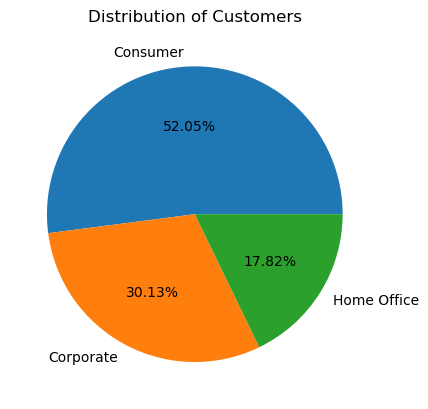

In [15]:
### Customer segmentation

# checking types of customers
types_of_customers = df['Segment'].unique()
print(types_of_customers)
print("")

# Counting each type of total customers
count_customer = df['Segment'].value_counts().reset_index().rename(columns={'Segment':'Customer Type','count':'Total Customers'})
print(count_customer)
print("")

# Visualizing through pie-chart
plt.pie(count_customer['Total Customers'], labels=count_customer['Customer Type'],autopct='%1.2f%%')
plt.title("Distribution of Customers")
print("")


  Customer Type  Total Sale's
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05




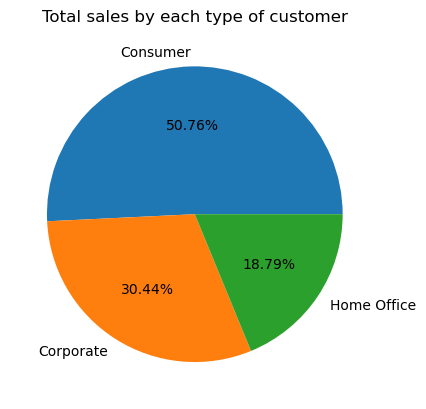

In [16]:
### Total sales by each type of customer

# Calculating total sales 
sales_bycustomer = df.groupby('Segment')['Sales'].sum().reset_index().rename(columns={'Segment':'Customer Type','Sales':"Total Sale's"})
print(sales_bycustomer)
print("")

# Visualizing through pie-chart
plt.pie(sales_bycustomer["Total Sale's"], labels=sales_bycustomer['Customer Type'],autopct='%1.2f%%')
plt.title("Total sales by each type of customer")
print("")

Text(0, 0.5, "Total Sale's (million $) ")

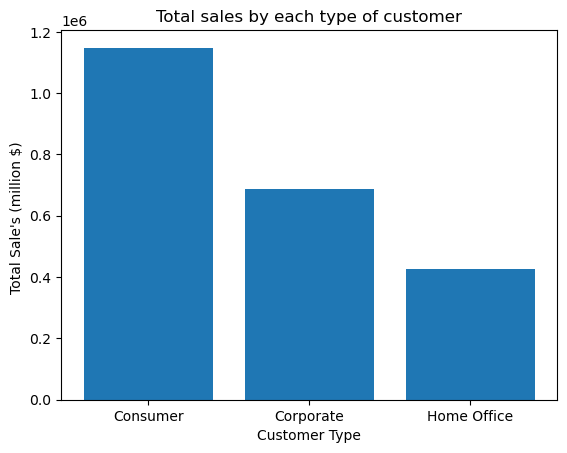

In [17]:
# Visualizing through Bar-graph

plt.bar(sales_bycustomer['Customer Type'],sales_bycustomer["Total Sale's"])
plt.title("Total sales by each type of customer")
plt.xlabel("Customer Type")
plt.ylabel("Total Sale's (million $) ")

### 2. Customer Loyalty analysis


In [19]:
### Checkng for customers who repeatedly purchased from superstore

## LOYAL CUSTOMER BY REPEAT ORDERS

# Grouping data by customer ID/Name and calculating frequency of their order.
customers_byorders = df.groupby(["Customer ID","Customer Name" , "Segment"])['Order ID'].count().reset_index().rename(columns = {"Segment" : "Customer Type" , "Order ID" : "Total Orders"} )
print(customers_byorders)

#Identifying repeat customers
repeat_customer = customers_byorders[customers_byorders["Total Orders"] >= 1 ]

# sorting repeat customers
sort_customers = repeat_customer.sort_values(by="Total Orders" , ascending=False)
print(sort_customers.reset_index(drop = True))


    Customer ID       Customer Name Customer Type  Total Orders
0      AA-10315          Alex Avila      Consumer            11
1      AA-10375        Allen Armold      Consumer            15
2      AA-10480        Andrew Allen      Consumer            12
3      AA-10645       Anna Andreadi      Consumer            18
4      AB-10015       Aaron Bergman      Consumer             6
..          ...                 ...           ...           ...
788    XP-21865        Xylona Preis      Consumer            28
789    YC-21895      Yoseph Carroll     Corporate             8
790    YS-21880       Yana Sorensen     Corporate            12
791    ZC-21910    Zuschuss Carroll      Consumer            31
792    ZD-21925  Zuschuss Donatelli      Consumer             9

[793 rows x 4 columns]
    Customer ID        Customer Name Customer Type  Total Orders
0      WB-21850        William Brown      Consumer            35
1      PP-18955           Paul Prost   Home Office            34
2      MA-175

In [20]:
### Checkng for customers who spent more from superstore 

## LOYAL CUSTOMER BY MOST EXPENDITURE

# Grouping data by customer ID/Name and Sales.
customers_bysales = df.groupby(["Customer ID","Customer Name", "Segment"])['Sales'].sum().reset_index().rename(columns = { "Sales" : "Total Spents"} )
print(customers_bysales)

# Sorting by expenditure of customer
sort_bysales = customers_bysales.sort_values(by="Total Spents" , ascending=False)
print(sort_bysales.reset_index(drop = True))

    Customer ID       Customer Name    Segment  Total Spents
0      AA-10315          Alex Avila   Consumer      5563.560
1      AA-10375        Allen Armold   Consumer      1056.390
2      AA-10480        Andrew Allen   Consumer      1790.512
3      AA-10645       Anna Andreadi   Consumer      5086.935
4      AB-10015       Aaron Bergman   Consumer       886.156
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer      2374.658
789    YC-21895      Yoseph Carroll  Corporate      5454.350
790    YS-21880       Yana Sorensen  Corporate      6720.444
791    ZC-21910    Zuschuss Carroll   Consumer      8025.707
792    ZD-21925  Zuschuss Donatelli   Consumer      1493.944

[793 rows x 4 columns]
    Customer ID    Customer Name      Segment  Total Spents
0      SM-20320      Sean Miller  Home Office     25043.050
1      TC-20980     Tamara Chand    Corporate     19052.218
2      RB-19360     Raymond Buch     Consumer     15117.339
3   

### Shipping mode analysis

['Second Class' 'Standard Class' 'First Class' 'Same Day']

        Ship Mode  Use frequency
0  Standard Class           5859
1    Second Class           1902
2     First Class           1501
3        Same Day            538


Text(0.5, 1.0, 'Shipping method preference')

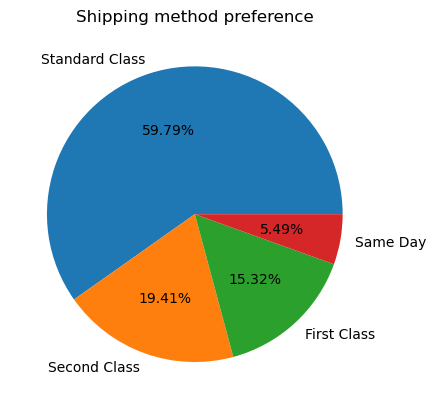

In [22]:

## Its will show which method of shipping is preferred more by customer and store for delivery of order.

# Checking modes of shipping
shipping_types = df["Ship Mode"].unique()
print(shipping_types)
print("")

# Segmenting by frequency of ship mode used
ship_freq = df["Ship Mode"].value_counts().reset_index().rename(columns={"count":"Use frequency"})
print(ship_freq)

# Visualizing through pie-chart
plt.pie(ship_freq['Use frequency'],labels=ship_freq["Ship Mode"],autopct='%1.2f%%' )
plt.title("Shipping method preference")

### Geographical analysis

In [24]:
## this analysis will provide us with the state where superstore is famous and state where it can do more marketing. 

# Grouping various geograpic information on customers 
geo_analyze = df.groupby(["Region" , "State" , "City"])['Segment'].value_counts().reset_index()
print(geo_analyze)



       Region       State               City      Segment  count
0     Central    Illinois  Arlington Heights     Consumer      1
1     Central    Illinois             Aurora     Consumer     13
2     Central    Illinois             Aurora  Home Office     12
3     Central    Illinois             Aurora    Corporate      9
4     Central    Illinois        Bloomington     Consumer      7
...       ...         ...                ...          ...    ...
1160     West  Washington            Spokane     Consumer      3
1161     West  Washington            Spokane  Home Office      1
1162     West  Washington          Vancouver    Corporate      4
1163     West  Washington          Vancouver  Home Office      1
1164     West     Wyoming           Cheyenne  Home Office      1

[1165 rows x 5 columns]


In [25]:
# Segmenting customers by region

cregion = df["Region"].value_counts().reset_index().rename(columns={"count":"No. of customers"})
print(cregion)
print("")

# Segmenting customers by states

cstate = df["State"].value_counts().reset_index().rename(columns={"count":"No. of customers"})
print(cstate.head(4))
print("")

# Segmenting customers by cities

ccity = df["City"].value_counts().reset_index().rename(columns={"count":"No. of customers"})
print(ccity.head(4))

    Region  No. of customers
0     West              3140
1     East              2785
2  Central              2277
3    South              1598

          State  No. of customers
0    California              1946
1      New York              1097
2         Texas               973
3  Pennsylvania               582

            City  No. of customers
0  New York City               891
1    Los Angeles               728
2   Philadelphia               532
3  San Francisco               500


In [26]:
# Segmenting sales by region

sregion = df.groupby(["Region"])['Sales'].sum().reset_index().rename(columns={"Sales":"Total sales"})
sregion = sregion.sort_values(by='Total sales',ascending=False)
print(sregion.reset_index(drop=True))
print("")

# Segmenting sales by states

sstate = df.groupby(["State"])['Sales'].sum().reset_index().rename(columns={"Sales":"Total sales"})
sstate = sstate.sort_values(by='Total sales',ascending=False)
print(sstate.head(4).reset_index(drop=True))
print("")

# Segmenting sales by cities

scity = df.groupby(["City"])['Sales'].sum().reset_index().rename(columns={"Sales":"Total sales"})
scity = scity.sort_values(by='Total sales',ascending=False)
print(scity.head(4).reset_index(drop=True))

    Region  Total sales
0     West  710219.6845
1     East  669518.7260
2  Central  492646.9132
3    South  389151.4590

        State  Total sales
0  California  446306.4635
1    New York  306361.1470
2       Texas  168572.5322
3  Washington  135206.8500

            City  Total sales
0  New York City   252462.547
1    Los Angeles   173420.181
2        Seattle   116106.322
3  San Francisco   109041.120


### Product analysis

In [28]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [29]:
### Checking types of products available in sperstore

# Major product categories

products = df['Category'].unique()
print(products)
print("")

# types and count of product in sub-category

unique_subp = df.groupby('Category')['Sub-Category'].agg(lambda x: list(x.unique())).reset_index()
count_subp = df.groupby('Category')['Sub-Category'].nunique().reset_index()

# mearging sub-category types , counts dataframes 
sub_products = pd.merge(unique_subp, count_subp, on='Category')
sub_products.columns = ['Category', 'Unique Sub-Categories', 'Count']
print(sub_products)
print("")



['Furniture' 'Office Supplies' 'Technology']

          Category                              Unique Sub-Categories  Count
0        Furniture           [Bookcases, Chairs, Tables, Furnishings]      4
1  Office Supplies  [Labels, Storage, Art, Binders, Appliances, Pa...      9
2       Technology           [Phones, Accessories, Machines, Copiers]      4



          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340

           Category Sub-Category        Sales
0        Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
2   Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
4   Office Supplies      Binders  200028.7850
5        Technology     Machines  189238.6310
6        Technology  Accessories  164186.7000
7        Technology      Copiers  146248.0940
8         Furniture    Bookcases  113813.1987
9   Office Supplies   Appliances  104618.4030
10        Furniture  Furnishings   89212.0180
11  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
13  Office Supplies          Art   26705.4100
14  Office Supplies    Envelopes   16128.0460
15  Office Supplies       Labels   12347.7260
16  Office Supplies    Fasteners    3001.9600


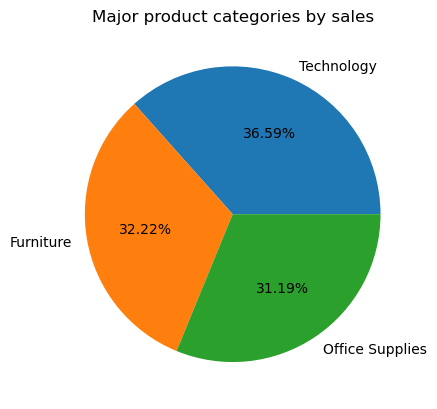

In [30]:
### Segmenting products by their sales

#segmenting major product categories by sale
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by='Sales',ascending=False).reset_index(drop=True)
print(category_sales)                                                                                   
print("")  

#visualizing through pie-chart
plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct='%1.2f%%')
plt.title('Major product categories by sales')

#segmenting product sub-categories by sale
sub_products_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
sub_products_sales = sub_products_sales.sort_values(by='Sales',ascending=False).reset_index(drop=True)
print(sub_products_sales)

           Category Sub-Category        Sales
0        Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
2   Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
4   Office Supplies      Binders  200028.7850
5        Technology     Machines  189238.6310
6        Technology  Accessories  164186.7000
7        Technology      Copiers  146248.0940
8         Furniture    Bookcases  113813.1987
9   Office Supplies   Appliances  104618.4030
10        Furniture  Furnishings   89212.0180
11  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
13  Office Supplies          Art   26705.4100
14  Office Supplies    Envelopes   16128.0460
15  Office Supplies       Labels   12347.7260
16  Office Supplies    Fasteners    3001.9600



Text(0.5, 1.0, 'Top product sub-categories by sales')

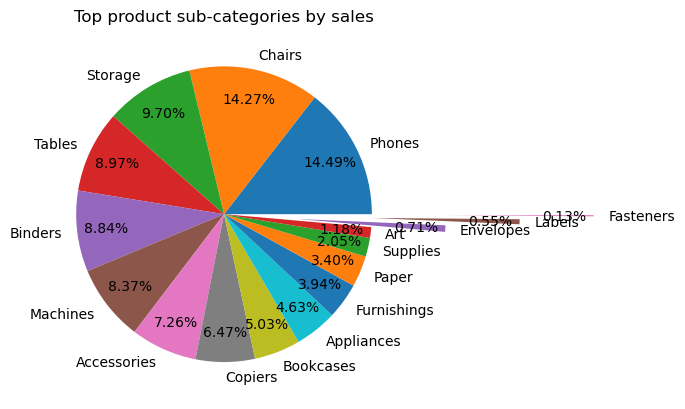

In [31]:
#segmenting product sub-categories by sale
sub_products_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
sub_products_sales = sub_products_sales.sort_values(by='Sales',ascending=False).reset_index(drop=True)
print(sub_products_sales)
print("")

#visualizing through pie-chart
explode = [0] * 14 + [0.5, 1, 1.5]
plt.pie(sub_products_sales['Sales'],labels=sub_products_sales['Sub-Category'],autopct='%1.2f%%',pctdistance=.8, explode= explode)
plt.title('Top product sub-categories by sales')



           Category Sub-Category        Sales
0        Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
2   Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
4   Office Supplies      Binders  200028.7850
5        Technology     Machines  189238.6310
6        Technology  Accessories  164186.7000
7        Technology      Copiers  146248.0940
8         Furniture    Bookcases  113813.1987
9   Office Supplies   Appliances  104618.4030
10        Furniture  Furnishings   89212.0180
11  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
13  Office Supplies          Art   26705.4100
14  Office Supplies    Envelopes   16128.0460
15  Office Supplies       Labels   12347.7260
16  Office Supplies    Fasteners    3001.9600



Text(0, 0.5, 'Product sub-categories')

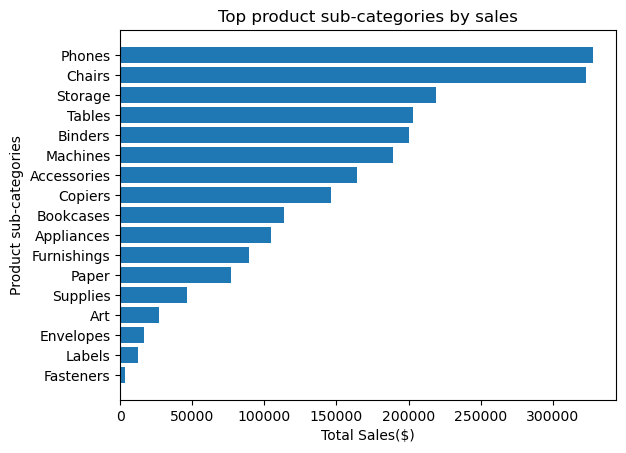

In [32]:
#segmenting product sub-categories by sale
sub_products_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
sub_products_sales = sub_products_sales.sort_values(by='Sales',ascending=False).reset_index(drop=True)
print(sub_products_sales)
print("")


#visualizing through horizontal bar-graph

sub_products_sales = sub_products_sales.sort_values(by='Sales' ,ascending=True)

plt.barh(sub_products_sales['Sub-Category'],sub_products_sales['Sales'])

#labels
plt.title('Top product sub-categories by sales')
plt.xlabel('Total Sales($)')
plt.ylabel('Product sub-categories')

## SALES TREND ANALYSIS

#### Yearly sales trends

   Year        Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192



Text(0, 0.5, 'Total sales ($)')

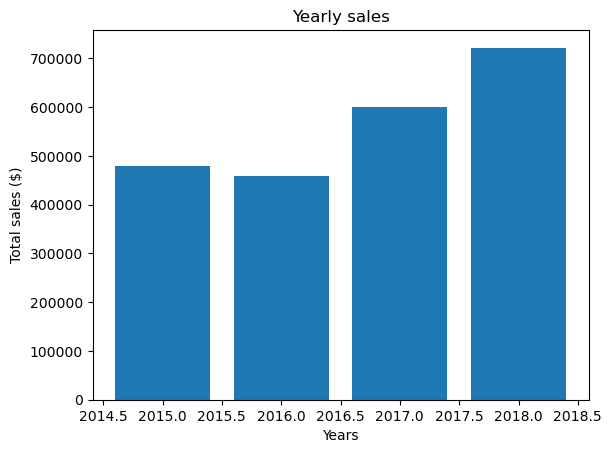

In [35]:
# re-ordering dd/mm/yyyy to yyyy/mm/dd

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)

# analyzing yearly sales trends

yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index().rename(columns={'Order Date':'Year'})
print(yearly_sales)
print("")

#visualizing through bar-graph

plt.bar(yearly_sales['Year'],yearly_sales['Sales'])
#labels
plt.title('Yearly sales')
plt.xlabel('Years')
plt.ylabel('Total sales ($)')

Text(0, 0.5, 'Total sales ($)')

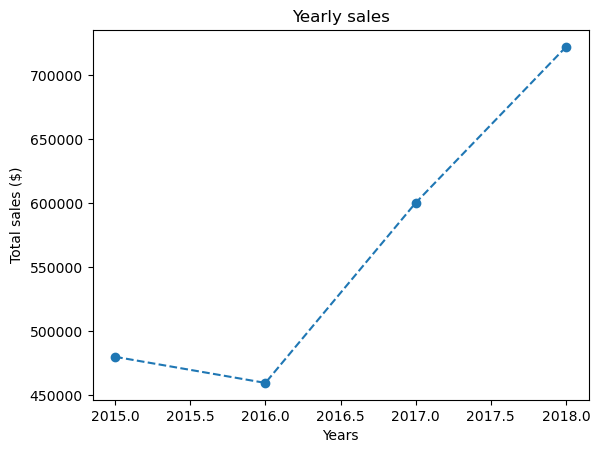

In [36]:
#visualizing through line plot

plt.plot(yearly_sales['Year'],yearly_sales['Sales'], marker="o",linestyle="--")
#labels
plt.title('Yearly sales')
plt.xlabel('Years')
plt.ylabel('Total sales ($)')

#### Quarterly sales trend

     Quarter        Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750



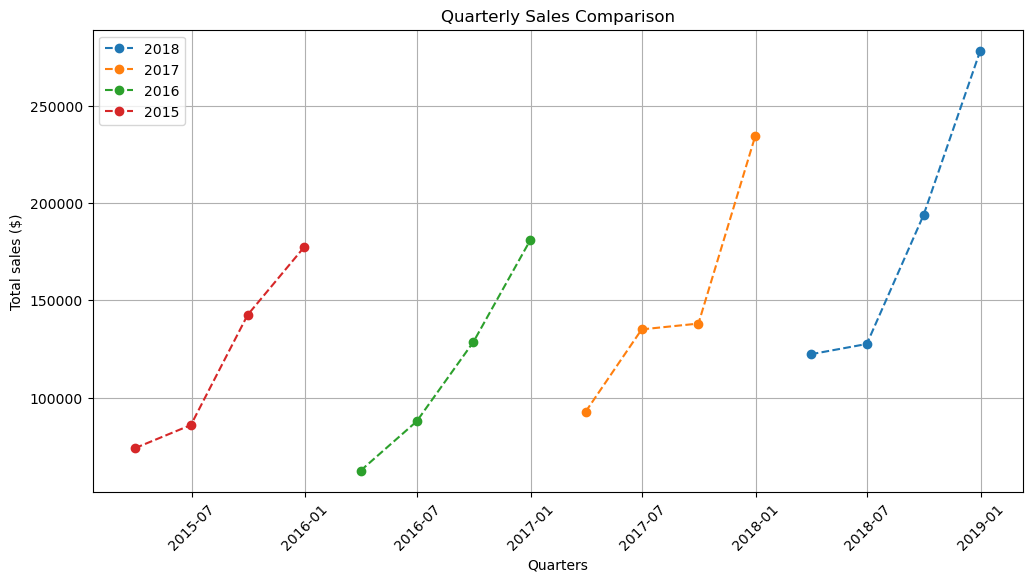

In [38]:
# re-ordering dd/mm/yyyy to yyyy/mm/dd

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)

# extracting and calculating quaterly sales for year 2018 , 2017 , 2016 , 2015

sales_2018 = df[df['Order Date'].dt.year == 2018]
quarterly_sales2018 = sales_2018.resample('Q' , on = 'Order Date')['Sales'].sum().reset_index().rename(columns={'Order Date':'Quarter'})
print(quarterly_sales2018)
print("")

#repeating same as above for other years
sales_2017 = df[df['Order Date'].dt.year == 2017]
quarterly_sales2017 = sales_2017.resample('Q' , on = 'Order Date')['Sales'].sum().reset_index().rename(columns={'Order Date':'Quarter'})

sales_2016 = df[df['Order Date'].dt.year == 2016]
quarterly_sales2016 = sales_2016.resample('Q' , on = 'Order Date')['Sales'].sum().reset_index().rename(columns={'Order Date':'Quarter'})

sales_2015 = df[df['Order Date'].dt.year == 2015]
quarterly_sales2015 = sales_2015.resample('Q' , on = 'Order Date')['Sales'].sum().reset_index().rename(columns={'Order Date':'Quarter'})

#Visualizing quarterly sales through line plot

#for spacing between ticks on axes
plt.figure(figsize=(12, 6))

plt.plot(quarterly_sales2018['Quarter'], quarterly_sales2018['Sales'], marker="o", linestyle="--" ,label='2018')
plt.plot(quarterly_sales2017['Quarter'], quarterly_sales2017['Sales'], marker="o", linestyle="--", label='2017')
plt.plot(quarterly_sales2016['Quarter'], quarterly_sales2016['Sales'], marker="o", linestyle="--", label='2016')
plt.plot(quarterly_sales2015['Quarter'], quarterly_sales2015['Sales'], marker="o", linestyle="--", label='2015')

#labels
plt.title('Quarterly Sales Comparison')
plt.xlabel('Quarters')
plt.xticks(rotation=45)
plt.ylabel('Total sales ($)')
plt.legend()
plt.grid()
plt.show()


Quarterly sales for 2018:
     Quarter        Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750

Quarterly sales for 2017:
     Quarter        Sales
0 2017-03-31   92686.3650
1 2017-06-30  135061.1610
2 2017-09-30  138056.3742
3 2017-12-31  234388.6498

Quarterly sales for 2016:
     Quarter        Sales
0 2016-03-31   62357.6870
1 2016-06-30   87713.3730
2 2016-09-30  128560.2072
3 2016-12-31  180804.7382

Quarterly sales for 2015:
     Quarter        Sales
0 2015-03-31   73931.3960
1 2015-06-30   85874.0936
2 2015-09-30  142522.6063
3 2015-12-31  177528.1122



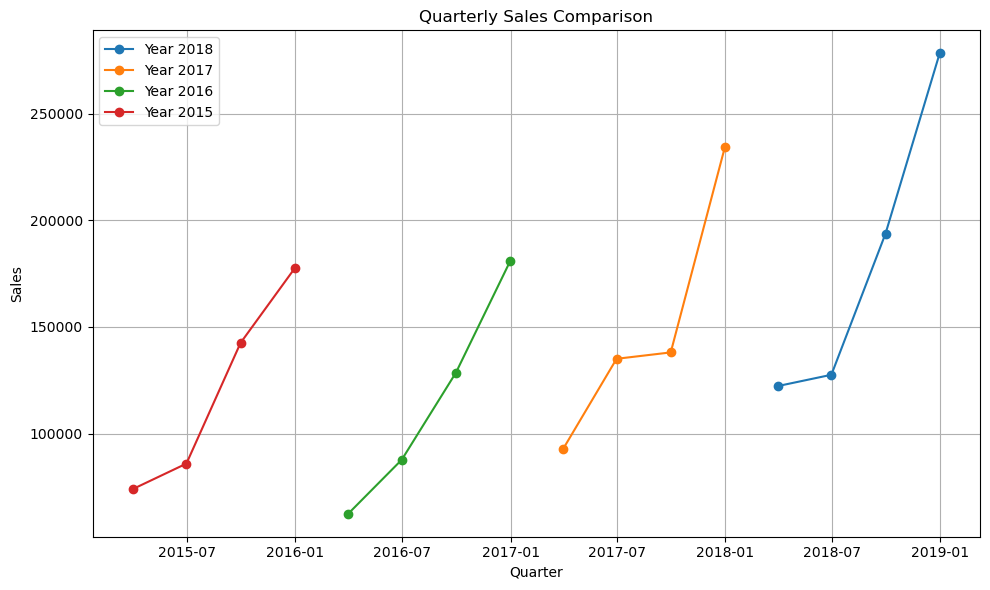

In [39]:
## CODE WITH APPLIED PYTHON CONCEPTS ABOVE CODE

# Function to calculate quarterly sales based of code above
def calculate_quarterly_sales(df, year):
    
    sales_year = df[df['Order Date'].dt.year == year]
    quarterly_sales = sales_year.resample('Q', on='Order Date')['Sales'].sum().reset_index().rename(columns={'Order Date': 'Quarter'})
    return quarterly_sales
   
# Loop through desired years

years = [2018 , 2017, 2016, 2015]
quarterly_sales_list = []

for year in years:
    quarterly_sales = calculate_quarterly_sales(df, year)
    quarterly_sales_list.append(quarterly_sales)
    print(f"Quarterly sales for {year}:")
    print(quarterly_sales)
    print("")

#for spacing between ticks on axes
plt.figure(figsize=(10, 6))

#visualizing quarterly sales through line plot
for year, quarterly_sales in enumerate(quarterly_sales_list):
    plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales'], marker='o', label=f'Year {years[year]}')
    
#plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales'], marker='o', label='years')

#title and labels
plt.title('Quarterly Sales Comparison')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


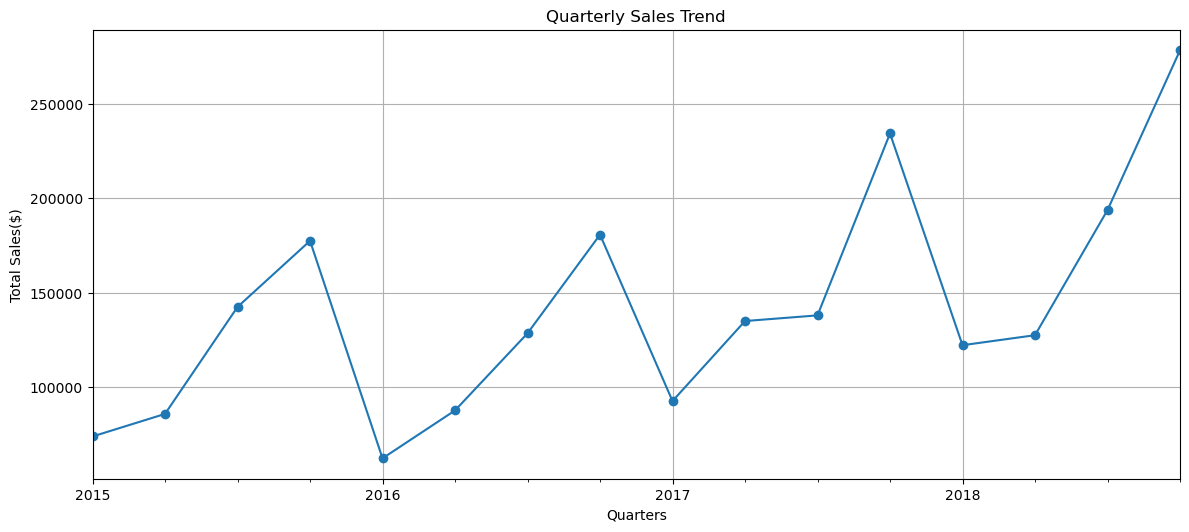

In [40]:
### QUARTERLY SALES TREND OVER ALL YEARS

# Converting the "Order Date" column to datetime format(yyyy/mm/dd)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Grouping the data by quarters and calculating the total sales or each quarter
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

#Visualizing quarterly sales trend over all years

plt.figure(figsize=(12, 20))
plt.subplot(4, 1, 2)

quarterly_sales.plot(kind='line', marker='o')

plt.title('Quarterly Sales Trend')
plt.xlabel('Quarters')
plt.ylabel('Total Sales($)')
plt.grid()
plt.tight_layout()
plt.show()


#### Monthly sales trend

Year         2015        2016        2017         2018
Month                                                 
1      14205.7070  18066.9576  18542.4910   43476.4740
2       4519.8920  11951.4110  22978.8150   19920.9974
3      55205.7970  32339.3184  51165.0590   58863.4128
4      27906.8550  34154.4685  38679.7670   35541.9101
5      23644.3030  29959.5305  56656.9080   43825.9822
6      34322.9356  23599.3740  39724.4860   48190.7277
7      33781.5430  28608.2590  38320.7830   44825.1040
8      27117.5365  36818.3422  30542.2003   62837.8480
9      81623.5268  63133.6060  69193.3909   86152.8880
10     31453.3930  31011.7375  59583.0330   77448.1312
11     77907.6607  75249.3995  79066.4958  117938.1550
12     68167.0585  74543.6012  95739.1210   83030.3888



<Figure size 1200x2000 with 0 Axes>

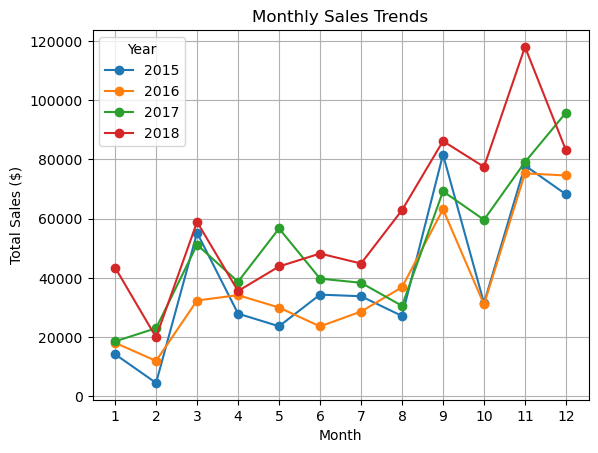

In [97]:
# re-ordering dd/mm/yyyy to yyyy/mm/dd

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True)

# extracting year and month from order date column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# analyzing monthly sales trends
monthly_sales3 = df.groupby(['Year','Month'])['Sales'].sum().unstack(level=0)
print(monthly_sales3)
print("")

# Visualizing monthly sales trends

#for spacing between ticks on axes

plt.figure(figsize=(12, 20))
monthly_sales3.plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

Monthly Sales for 2018:
        Month        Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


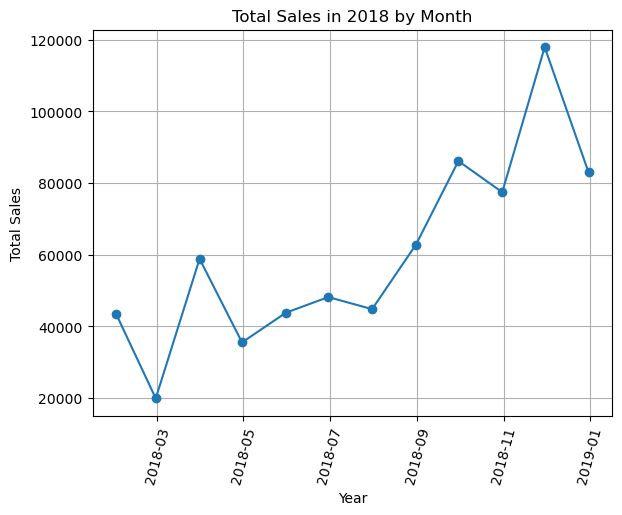

In [81]:
# Extracting data for 2018  and calculate the monthly sales
year_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = year_sales.resample('M', on='Order Date')['Sales'].sum().reset_index().rename(columns={'Order Date':'Month'})
print("Monthly Sales for 2018:")
print(monthly_sales) 

#visualizing line graph monthly sales trend in 2018
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales in 2018 by Month')
plt.grid()
plt.tight_layout()
plt.xticks(rotation=75)

plt.show()

In [44]:
### PIVOT METHOD

# monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='Sales')
# for year in monthly_sales_pivot.columns:
    # plt.plot(monthly_sales_pivot.index, monthly_sales_pivot[year], marker='o', label=year)

### WITHOUT PIVOT
# for year in monthly_sales['Year'].unique():
    # monthly_data = monthly_sales[monthly_sales['Year'] == year]
    # plt.plot(monthly_data['Month'], monthly_data['Sales'], marker='o',label='Year')

# BOTH ARE INEFFICENT AS WE AS USE UNSTACK INSTED OF PIVOT AND SEABORN INSTERD OF FOR LOOP
# MOST EFFICENT METHOD IS UNSTACK MOTHOD

    Year  Month        Sales
0   2015      1   14205.7070
1   2015      2    4519.8920
2   2015      3   55205.7970
3   2015      4   27906.8550
4   2015      5   23644.3030
5   2015      6   34322.9356
6   2015      7   33781.5430
7   2015      8   27117.5365
8   2015      9   81623.5268
9   2015     10   31453.3930
10  2015     11   77907.6607
11  2015     12   68167.0585
12  2016      1   18066.9576
13  2016      2   11951.4110
14  2016      3   32339.3184
15  2016      4   34154.4685
16  2016      5   29959.5305
17  2016      6   23599.3740
18  2016      7   28608.2590
19  2016      8   36818.3422
20  2016      9   63133.6060
21  2016     10   31011.7375
22  2016     11   75249.3995
23  2016     12   74543.6012
24  2017      1   18542.4910
25  2017      2   22978.8150
26  2017      3   51165.0590
27  2017      4   38679.7670
28  2017      5   56656.9080
29  2017      6   39724.4860
30  2017      7   38320.7830
31  2017      8   30542.2003
32  2017      9   69193.3909
33  2017     1

C:\Users\Rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


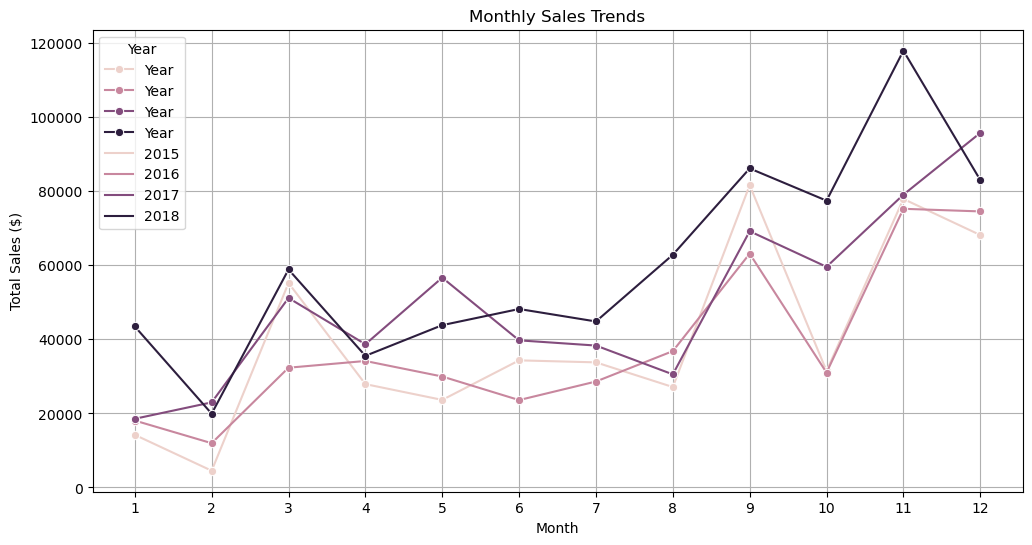

In [45]:
# analyzing monthly sales trends
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
print(monthly_sales)
print("")

### METHOD 1-USING SEABORN - WITHOUT PIVOTING OR FOR LOOP
# Visualizing monthly sales trends

#for spacing between ticks on axes
plt.figure(figsize=(12, 6))

#1. without loop and pivot
sns.lineplot( data=monthly_sales , x='Month' , y ='Sales' ,hue='Year', marker="o",label='Year')

#labels
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True) 


Order Date
2015-01     14205.7070
2015-02      4519.8920
2015-03     55205.7970
2015-04     27906.8550
2015-05     23644.3030
2015-06     34322.9356
2015-07     33781.5430
2015-08     27117.5365
2015-09     81623.5268
2015-10     31453.3930
2015-11     77907.6607
2015-12     68167.0585
2016-01     18066.9576
2016-02     11951.4110
2016-03     32339.3184
2016-04     34154.4685
2016-05     29959.5305
2016-06     23599.3740
2016-07     28608.2590
2016-08     36818.3422
2016-09     63133.6060
2016-10     31011.7375
2016-11     75249.3995
2016-12     74543.6012
2017-01     18542.4910
2017-02     22978.8150
2017-03     51165.0590
2017-04     38679.7670
2017-05     56656.9080
2017-06     39724.4860
2017-07     38320.7830
2017-08     30542.2003
2017-09     69193.3909
2017-10     59583.0330
2017-11     79066.4958
2017-12     95739.1210
2018-01     43476.4740
2018-02     19920.9974
2018-03     58863.4128
2018-04     35541.9101
2018-05     43825.9822
2018-06     48190.7277
2018-07     44825.1040


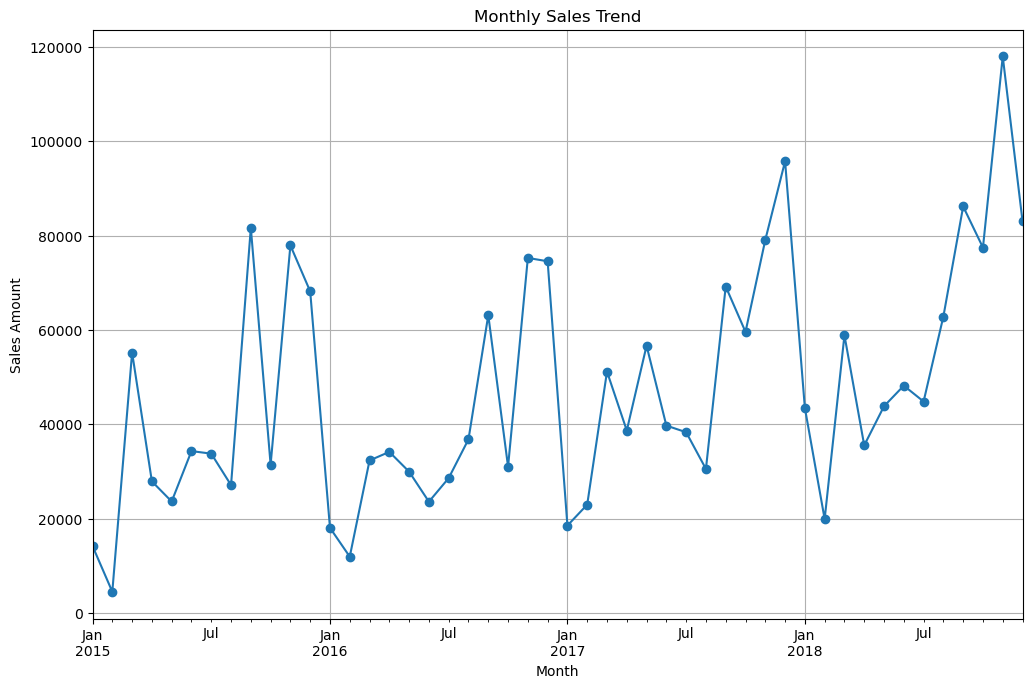

In [46]:
# Convert the "Order Date" column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
print(monthly_sales)

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
# Adjust layout and display the plots
# plt.tight_layout()
plt.show()